# 1-3 Blind source separation using FastICA

In [31]:
import scipy.io as scio
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from pandas import *
from pylab import *
from sklearn.decomposition import FastICA, PCA
import h5py
%matplotlib inline  


fnwb = h5py.File('indy_20161017_02.nwb', 'r')

fs = 24414.0625
channel = 96
data = np.array(fnwb['acquisition']['timeseries']['broadband']['data']).T
length = len(data[0])
duration = length/fs
#print('data-information: \n shape: ' + str(data.shape) + '\n duration: '+  str(duration) + '\n sample_rate: '+ str(fs))
t = np.arange(0,length) / fs

data-information: 
 shape: (96, 12597793)
 duration: 516.00560128
 sample_rate: 24414.0625


In [32]:
# Compute ICA
s = int(80*fs)
e = int(86*fs)
X = data.T[s:e][0:-1]
ica = FastICA(n_components=channel)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

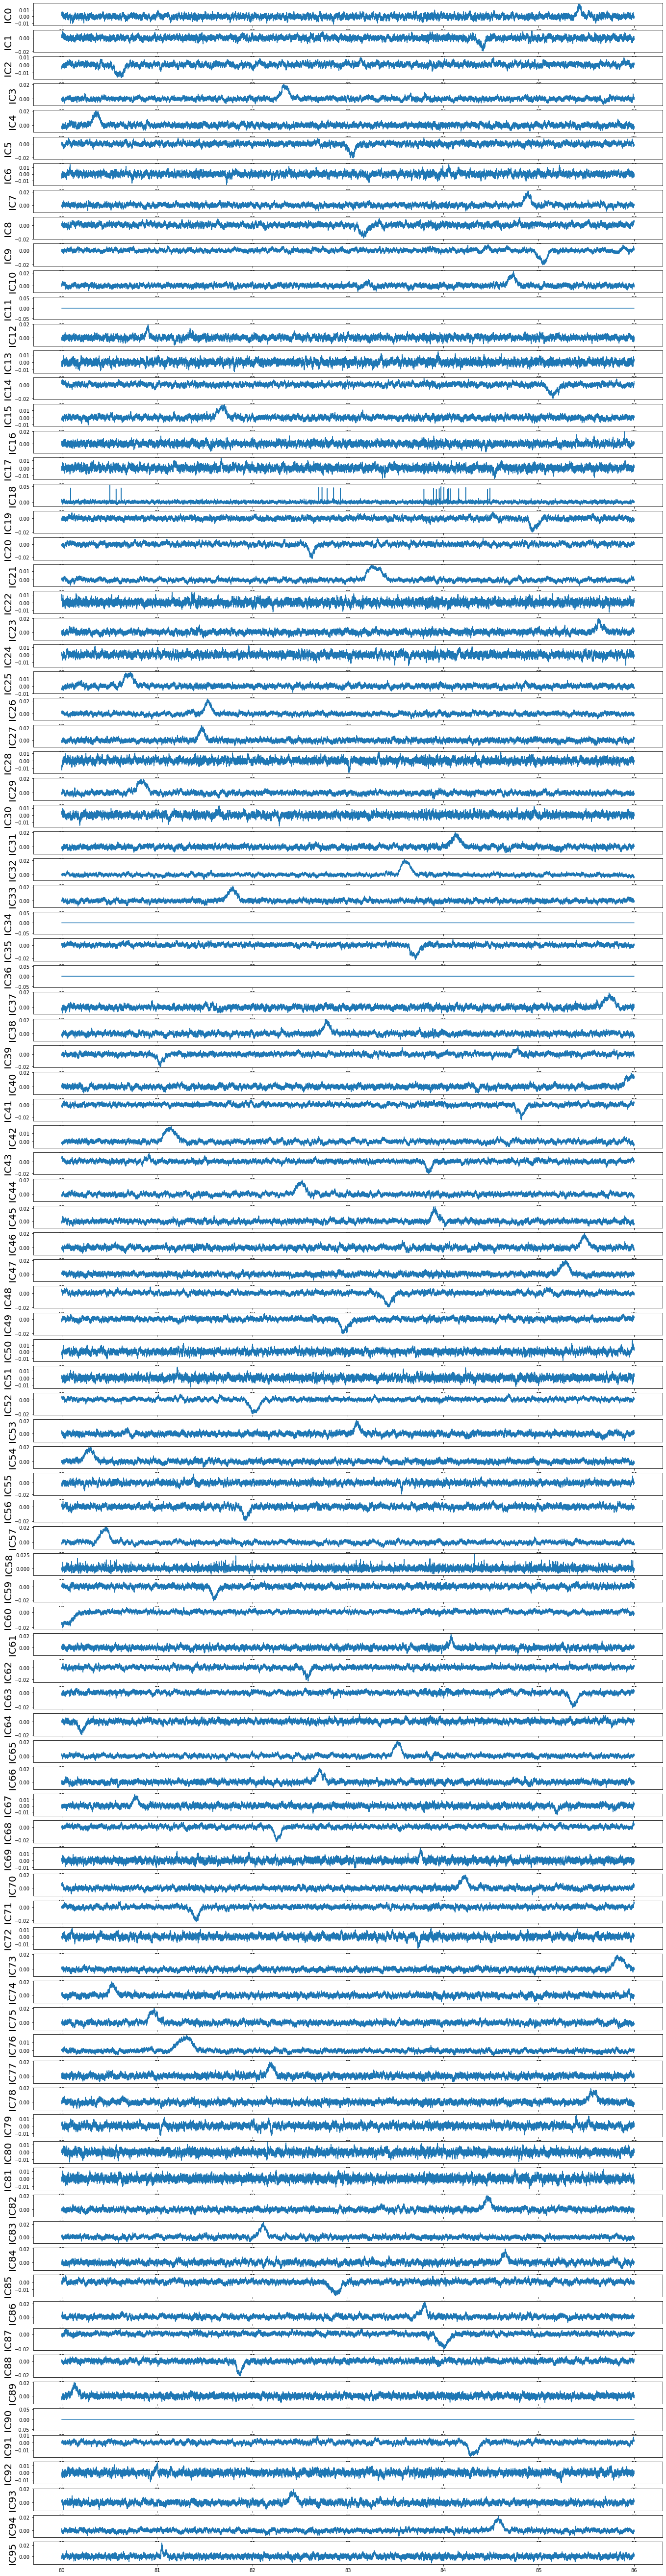

In [50]:
models = S_.T
names = ['ICA recovered signals']



fig = plt.figure(figsize = (23,channel))
ax = []

for [i, sig] in zip(range(channel), models):
    ax.append(fig.add_subplot(channel, 1, i+1))
    ax[i].set_ylabel('IC'+str(i), fontsize = 20)
    ax[i].plot(t[s:e-1],sig)
    
    



In [65]:
del_L = [6, 13, 16, 22, 90, 81, 88, 72, 60, 58, 51, 40, 36, 30, 80]
lenn = S_.shape[0]
for i in del_L:
    S_.T[i] = np.zeros(lenn)


(array([80., 81., 82., 83., 84., 85., 86.]),
 <a list of 7 Text xticklabel objects>)

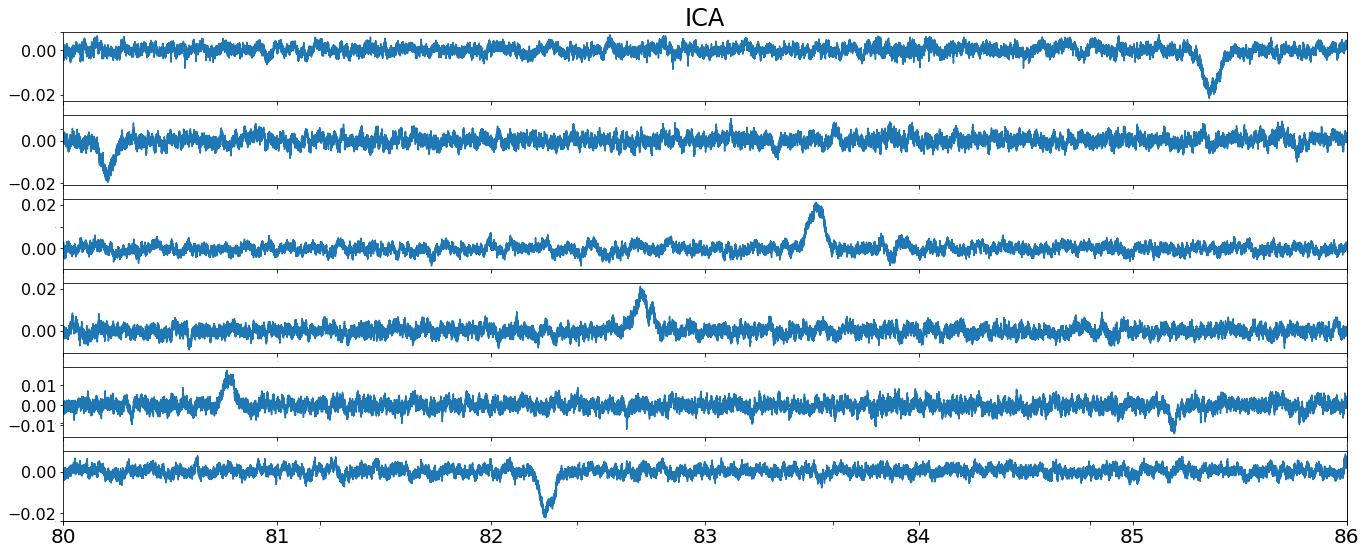

In [113]:
models = S_.T
names = ['ICA recovered signals']

channel = 6
fig.show()
fig = plt.figure(figsize = (23,channel*1.5))

plt.xticks(fontsize = 0)
plt.yticks(fontsize = 0)
ax = []
plt.title('ICA', fontsize = 24)
for [i, sig] in zip(range(channel), models[63:-1]):
    ax.append(fig.add_subplot(channel, 1, i+1))
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=16)
    ax[i].plot(t[s:e-1],sig)
    ax[i].set_xlim(80,86)
    #ax[i].set_ylabel('IC'+str(i+1), fontsize = 20)
    

plt.xticks(fontsize=20)  
    

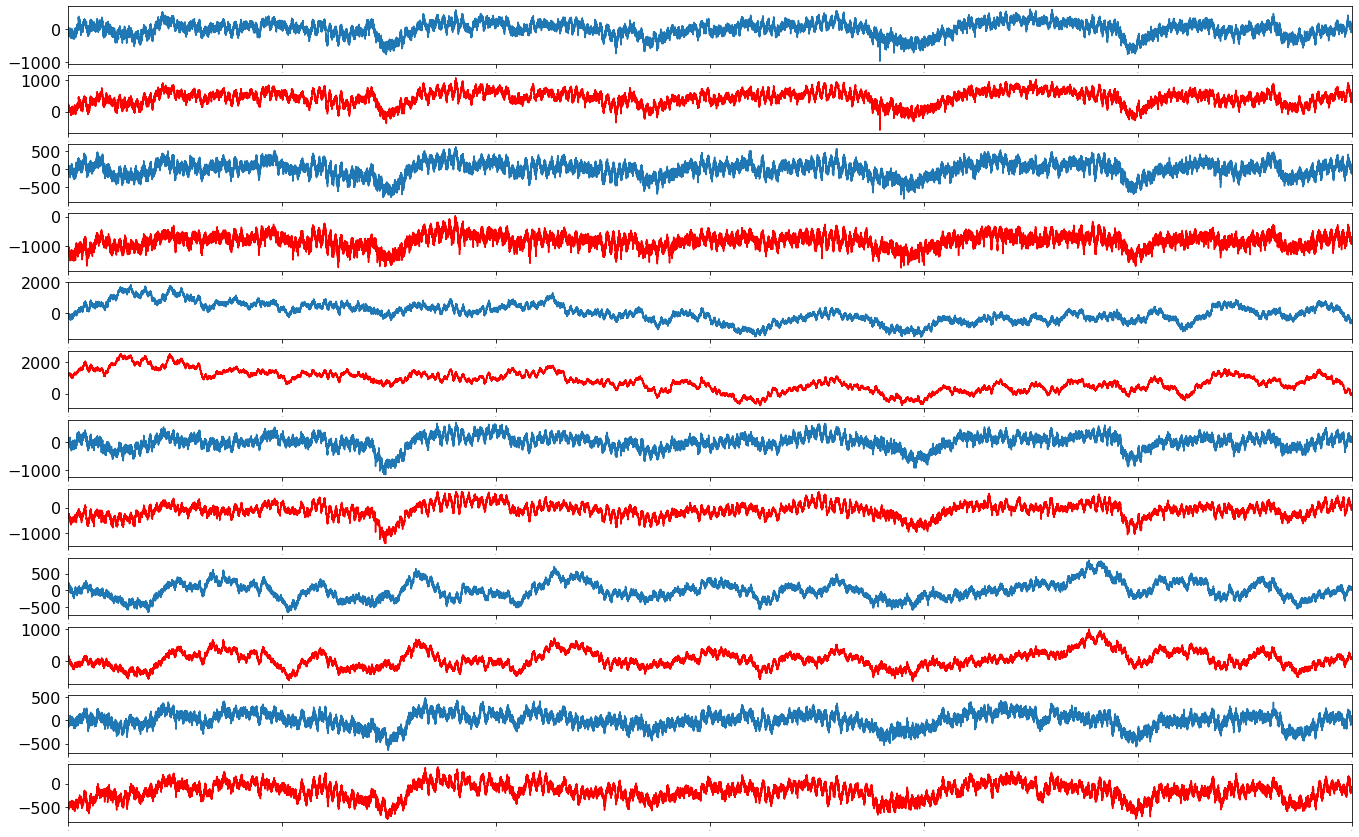

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

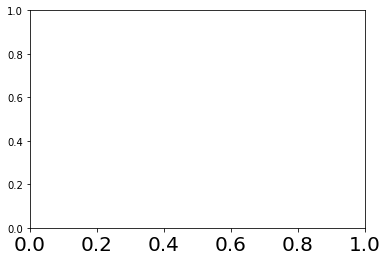

In [131]:
ee = S_.dot(A_.T)


fig = plt.figure(figsize = (23,15))
ax = []


for [i, sig, sigg] in zip(range(6), ee.T, data):
    ax.append(fig.add_subplot(12, 1, 2*i+1))
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=0)
    ax.append(fig.add_subplot(12, 1, 2*i+2))
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=16)
    #ax[i].plot(t[s:e-1],sig)
    ax[2*i].plot(t[s:e-1],sig)
    ax[2*i+1].plot(t[s:e], sigg[s:e] ,color = 'red')
    ax[2*i].set_xlim(80,86)
    ax[2*i+1].set_xlim(80,86)
    
plt.show()

plt.xticks(fontsize=20)

(80, 86)

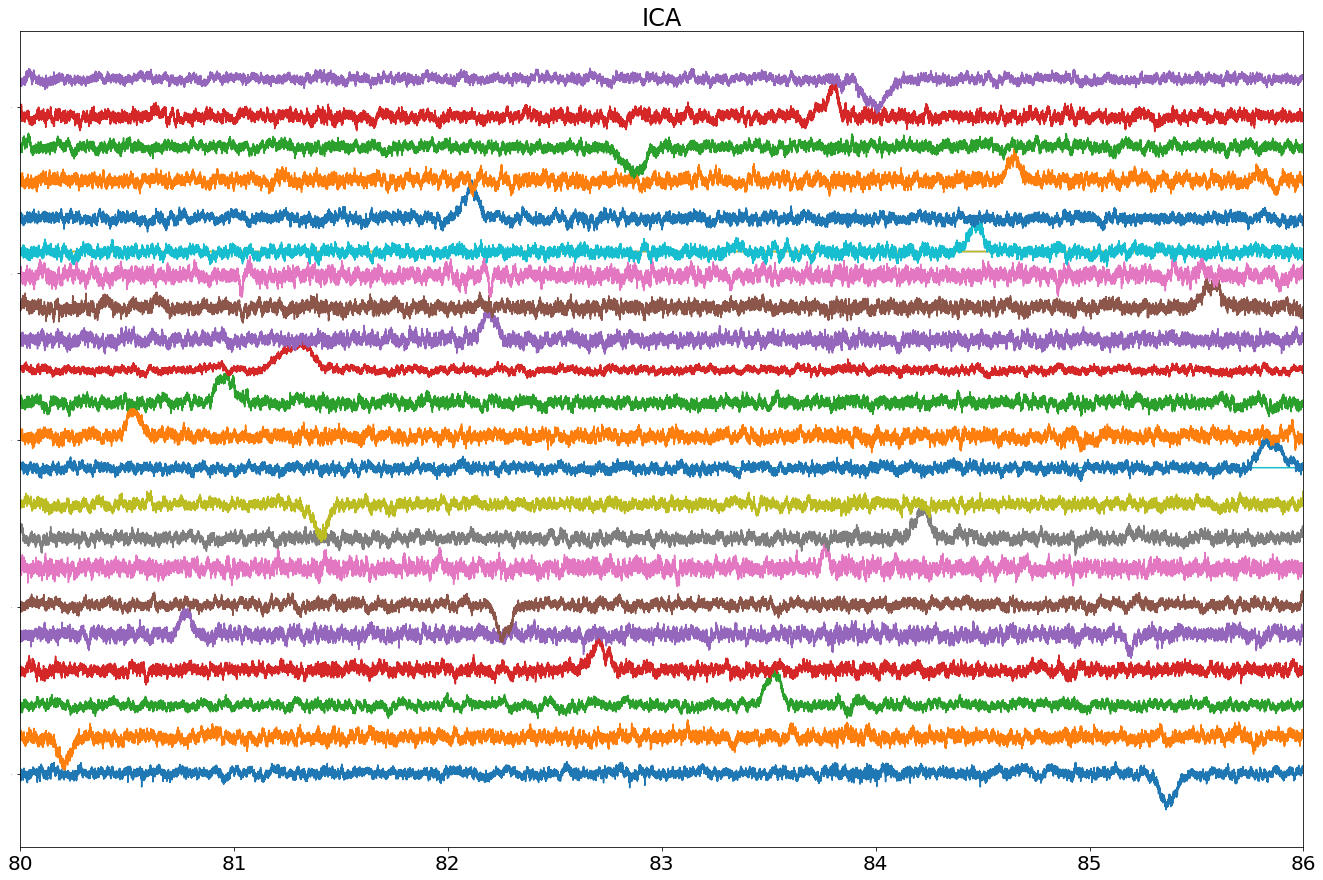

In [124]:
models = S_.T
names = ['ICA recovered signals']

channel = 25

fig = plt.figure(figsize = (23,15))

plt.xticks(fontsize = 0)
plt.yticks(fontsize = 0)
plt.title('ICA', fontsize = 24)
addd = 0
for [i, sig] in zip(range(channel), models[63:-1]):
    
    plt.plot(t[s:e-1],sig + addd)

    addd =  addd + (max(abs(sig)))

plt.xticks(fontsize=20)  
plt.xlim(80,86)

In [121]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

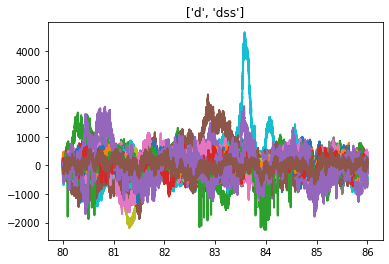

In [123]:
lineplot(t[s:e-1], ee, title = ['d','dss'])